# Метод Нестерова и обыкновенные дифференциальные уравнения

По материалам статьи [[W.Su, S. Boyd, E.Candes 2015]](https://arxiv.org/pdf/1503.01243.pdf)

## Постановка задачи

$$
\min_{x \in \mathbb{R}^n} f(x)
$$
- $f$ - непрерывная и дифференцируемая
- ограничений на $x$ нет
- для решения задачи можно использовать только значение функции и её градиент

## И снова градиентный спуск...

$$
x_{k+1} = x_{k} - s f'(x_k)
$$

**Теорема.** 

Пусть 

- $f(x)$ дифференцируема на $\mathbb{R}^n$, 
- градиент $f(x)$ удовлетворяет условию Липшица с константой $L$
- $f(x)$ ограничена снизу
- $s = \mathrm{const}$ и $0 < s < \frac{2}{L}$

Тогда для градиентного метода выполнено:
$$
\lim\limits_{k \to \infty} f'(x_k) = 0,
$$
а функция монотонно убывает $f(x_{k+1}) < f(x_k)$.

## Интерпретация градиентного спуска 

Рассмотрим обыкновенное диференциальное уравнение вида:
$$
\frac{dx}{dt} = -f'(x(t)) \quad x(0) = x_0
$$
и дискретизуем его на равномерной сетке с шагом $\alpha$:
$$
\frac{x_{k+1} - x_k}{s} = -f'(x_k),
$$
где $x_k \equiv x(t_k)$ и $s = t_{k+1} - t_k$ - шаг сетки.

Отсюда получаем выражение для $x_{k+1}$
$$
x_{k+1} = x_k - s f'(x_k),
$$
которое в точности совпадает с выраением для градиентного спуска.

Такая схема называется явной или прямой схемой Эйлера.

**Вопрос:** какая схема называется неявной или обратной?

In [1]:
import numpy as np

alpha = 10
def gradf(t):
    return alpha*t

x0 = 1
a = 0
b = 1
h = 1e-2
N = int((b - a) / h)
x = [x0]
for i in xrange(N):
    x.append(x[i] - h * gradf(x[i]))

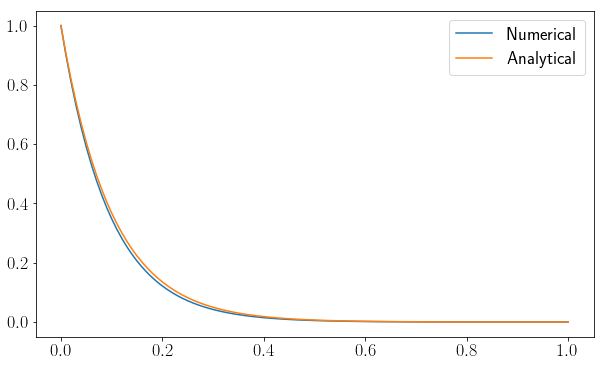

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
t = np.linspace(a, b, N+1, endpoint=True)
plt.figure(figsize=(10, 6))
plt.plot(t, x, label="Numerical")
plt.plot(t, x0 * np.exp(-alpha*t), label="Analytical")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

## Концепция нижних оценок скоростей сходимости

- Нижние оценки для некоторого класса задач и методов их решению имеют вид
$$
f(x_k) - f^* \geq O(h(k, \ldots)),
$$
то есть показывают какую максимальную скорость сходимости по функционалу может дать класс методов на выбранном классе задач

- Теория нижних оценок для большинства классов задач оптимизации разработана в монографии [[Немировский, Юдин 1979]](http://www.twirpx.com/file/451392/)

### Класс задач оптимизации

- Оценивать метод по тому, как он решает *конкретную* задачу бессмысленно, так как он может быть идеальным для единственной задачи и бесполезным для всех остальных
- Введём некоторый *класс* задач $P$, то есть множество задач, обладающие общим свойством
- Например, задачи безусловной оптимизации с сильно выпуклыми целевыми функциями

### Точность решения задачи

- Решение любой задачи является неточным
- Критерий остановки итерационного процесса $S_{\varepsilon}$
- Например, незначительное изменение функции, аргумента; малая норма градиента

### Нижняя оценка скорости сходимости

- Используется модель чёрного ящика
- Оценка верна для **всех** итерационных методов указанного класса на выбранном классе задач 
- Для получения нижних оценок часто используется сопротивляющийся оракул.

### Схема получения нижней оценки скорости сходимости

- Фиксириуется класс задач $P$
- Выбирается метод $M$
- Из $P$ определяется наиболее трудная задача $T$ для метода $M$
- Сложность решения $T$ методом $P$ определяет нижнюю оценку для метода $M$ на классе задач $P$

### Нижняя оценка скорости сходимости для методов первого порядка
Рассмотрим методы первого порядка для диференцируемых функций, такие что 
$$
x_{k+1} = \mathrm{Span}(f'(x_k), \ldots, f'(x_1))
$$
- **Теорема.** Существует выпуклая функция с $L$-липшицевым градиентом, такая что для любого метода первого порядка выполнено
$$
f(x_k) - f^* \geq \frac{3L}{32} \frac{\| x_0 - x^*\|^2}{(k+1)^2}
$$
- **Теорема.** Существует функция с $L$-липшицевым градиентом и $l$-сильно выпуклая, такая что для любого метода первого порядка выполнено
$$
f(x_k) - f^* \geq \frac{l}{2} \left( \frac{\sqrt{\kappa} - 1}{\sqrt{\kappa} + 1}\right)^{2k} \| x_0 - x^*\|^2,
$$
где $\kappa = \frac{L}{l}$ - оценка числа обусловленности гессиана.

## Оценка сходимости для градиентного спуска

- **Теорема.** Пусть $f$ выпуклая с $L$-липшицевым градиентом. Тогда для $s = \frac{1}{L}$ градиентный спуск сходится как
$$
f(x_k) - f^* \leq  \frac{2L \| x^* - x_0\|^2}{k}
$$

- **Теорема.** Пусть $f$ c $L$-дипшицевым градиентом и $l$-сильно выпукла. Тогда для градиентного спуска с $s = \dfrac{2}{l + L}$ выполнено:
$$
f(x_k) - f^* \leq \dfrac{L}{2} \left( \dfrac{\kappa - 1}{\kappa + 1} \right)^{2k} \| x_0 - x^*\|^2_2,
$$
где $\kappa = \frac{L}{l}$ - оценка сверху числа обусловленности гессиана

## Оптимальный метод Нестерова

- $x_0 = y_0$
- $s \leq \frac{1}{L}$, где $L$ константа Липшица для градиента
- 
$$
\begin{align*}
& x_k = y_{k-1} - sf'(y_{k-1})\\
& y_k = x_k + \frac{k-1}{k+2}(x_k - x_{k-1})
\end{align*}
$$

- Сходимость для выпуклой функции с $L$-липшицевым градиентом
$$
f(x_k) - f^* \leq O\left(\frac{\| x_k - x_0\|^2}{sk^2}\right)
$$

- Сходимость для $l$-сильно выпуклой функции с $L$-липшицевым градиентом
$$
f(x_k) - f^* \leq O\left(\left( \frac{\sqrt{\kappa} - 1}{\sqrt{\kappa} + 1}\right)^{2k}\right)
$$

## Интерпретация метода Нестерова

- Если градиентному спуску можно поставить в соответствие ОДУ, то какое ОДУ можно поставить в соответствие методу Нестерова?
- А вот какое
$$
\ddot{x} + \frac{3}{t}\dot{x} + f'(x) = 0, \quad x(0) = x_0 \quad \dot{x}(0) = 0
$$

Доказательство на доске

## Сходимость траектории к точке минимума $f$

**Теорема.**

Пусть $X(t)$ единственное глобальное pешение ОДУ для любой выпуклой функции $f$, у градиента которой может быть бесконечная константа Липшица.
Тогда для $t > 0$
$$
f(X(t)) - f^* \leq \frac{2\| x^* - x_0\|^2}{t^2}
$$

Доказательство на доске

## Влияние "трения" - $\frac{3}{t}\dot{x}$

- Метод Нестерова сходится немонотонно к решению из-за наличия "момента импульса"
- Для небольших $t$ множитель $\frac{3}{t}$ велик - предотвращение осцилляций
- Для больших $t$ множитель $\frac{3}{t}$ мал - система сильнее подверждена осцилляциям

### Toy problem

$$
f(x_1, x_2) = 2 \cdot 10^{-2}x_1^2 + 5 \cdot 10^{-3}x^2_2 \to \min, \; x_0 = (1, 1)
$$

In [3]:
def gradf(x):
    return np.array([0.04 * x[0], 0.01 * x[1]])

def f(x):
    return 0.02 * x[0]**2 + 0.005 * x[1]**2

In [4]:
def acc_gd(gradf, x0, s, tol=1e-6, maxiter=1000, disp=True):
    y = x0.copy()
    x_prev = x0.copy()
    grad = gradf(y)
    k = 1.0
    hist = [x0]
    while True:
        if np.linalg.norm(gradf(x_prev)) < tol and disp:
            print("Tolerance achieved!")
            break
        if k == maxiter and disp:
            print("Maxiter exceeds!")
            break
        x = y - s * grad
        y = x + (k - 1) / (k + 2) * (x - x_prev)
        x_prev = x
        grad = gradf(y)
        k += 1
        hist.append(x)
    return x, hist

In [5]:
def gd(f, gradf, x0, linesearch, tol=1e-6, maxiter=1000, disp=True):
    x = x0.copy()
    grad = gradf(x)
    k = 0
    hist = [x0]
    while True:
        if np.linalg.norm(grad) < tol and disp:
            print("Tolerance achieved!")
            break
        if k == maxiter and disp:
            print("Maxiter exceeds!")
            break
        s = linesearch(f, gradf, x, -grad)
        x = x - s * grad
        grad = gradf(x)
        k += 1
        hist.append(x)
    return x, hist

In [6]:
def cg_quad(A, b, x0, tol=1e-6):
    x = x0
    hist = [x]
    r = A.dot(x0) - b
    p = -r
    while np.linalg.norm(r) > tol:
        alpha = r.dot(r) / p.dot(A.dot(p))
        x = x + alpha * p
        hist.append(x)
        r_next = r + alpha * A.dot(p)
        beta = r_next.dot(r_next) / r.dot(r)
        p = -r_next + beta * p
        r = r_next
    return x, hist

In [7]:
def constant_step(f, gradf, x, descent_dir):
    return s

def backtracking(f, grad_f, x, descent_dir):
    alpha = 1
    beta1 = 0.1
    rho = 0.7
    while f(x + alpha * descent_dir) >= f(x) + beta1 * alpha * grad_f(x).dot(descent_dir):
        alpha *= rho
    return alpha

In [8]:
s = 0.25
methods = []
x_acc, hist_acc = acc_gd(gradf, np.array([1, 1]), s)
methods.append({"label": "Nesterov, $s = {}$".format(s), "hist": hist_acc})
x_gd, hist_gd = gd(f, gradf, np.array([1, 1]), constant_step)
methods.append({"label": "GD, $s = {}$".format(s), "hist": hist_gd})
x_adapt_gd, hist_adapt_gd = gd(f, gradf, np.array([1, 1]), backtracking)
methods.append({"label": "Backtracking GD", "hist": hist_adapt_gd})
x_cg, hist_cg = cg_quad(np.array([[4 * 1e-2, 0], [0, 1e-2]]), np.zeros(2), np.array([1, 1]))
methods.append({"label": "Conjugate GD", "hist": hist_cg})
print("Nesterov f* = {}".format(f(x_acc)))
print("GD f* = {}".format(f(x_gd)))
print("Adaptive GD f* = {}".format(f(x_adapt_gd)))
print("Conjugate GD f* = {}".format(f(x_cg)))

Tolerance achieved!
Maxiter exceeds!
Tolerance achieved!
Nesterov f* = 8.73382832096e-12
GD f* = 3.34795186591e-05
Adaptive GD f* = 4.94216107969e-11
Conjugate GD f* = 9.87039096498e-34


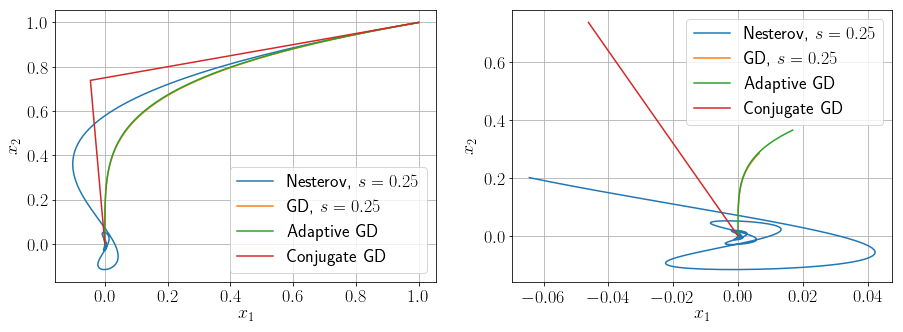

In [9]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
ax.plot([x[0] for x in hist_acc], [x[1] for x in hist_acc], label="Nesterov, $s = {}$".format(s))
ax.plot([x[0] for x in hist_gd], [x[1] for x in hist_gd], label="GD, $s = {}$".format(s))
ax.plot([x[0] for x in hist_adapt_gd], [x[1] for x in hist_adapt_gd], label="Adaptive GD")
ax.plot([x[0] for x in hist_cg], [x[1] for x in hist_cg], label="Conjugate GD")
ax.grid("on")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.legend(fontsize=18)
ax.tick_params(labelsize=18)

ax = fig.add_subplot(122)
acc_zoom_idx = 60
gd_zoom_idx = 500
gd_adapt_idx = 100
ax.plot([x[0] for x in hist_acc[acc_zoom_idx:]], [x[1] for x in hist_acc[acc_zoom_idx:]], label="Nesterov, $s = {}$".format(s))
ax.plot([x[0] for x in hist_gd[gd_zoom_idx:]], [x[1] for x in hist_gd[gd_zoom_idx:]], label="GD, $s = {}$".format(s))
ax.plot([x[0] for x in hist_adapt_gd[gd_adapt_idx:]], [x[1] for x in hist_adapt_gd[gd_adapt_idx:]], label="Adaptive GD")
ax.plot([x[0] for x in hist_cg[1:]], [x[1] for x in hist_cg[1:]], label="Conjugate GD")
ax.grid("on")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.legend(fontsize=18)
ax.tick_params(labelsize=18)

In [10]:
def plot_f(f, methods):
    plt.figure(figsize=(10, 8))
    for m in methods:
        plt.semilogy([f(x) for x in m["hist"]], label=m["label"])
    plt.legend(fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel("Number of iteration", fontsize=18)
    plt.ylabel("Objective function, $f$", fontsize=18)

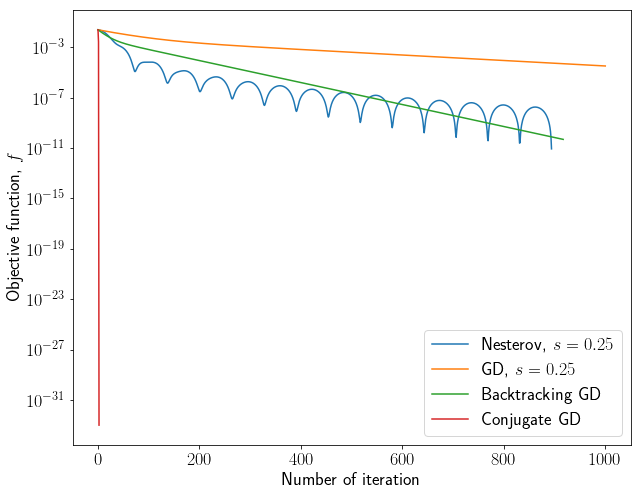

In [11]:
plot_f(f, methods)

### В чём идея ускорения в методе Нестерова по сравнению с градиентным спуском?

- Градиентный спуск - шаг длины $s$ вдоль траектории
- Метод Нестерова - шаг длины <span style="color:red">$\sqrt{s}$</span> вдоль траектории
- Для малых $s$ метод Нестерова движется быстрее!

**Однако!** На графике видно, как с приближением к точке минимума метод Нестерова начинает осциллировать.

### Как выбирать шаг для повышения устойчивости?

- Дискретизация ОДУ
$$
\frac{x(t + \Delta t) - 2x(t) + x(t - \Delta t)}{\Delta t^2} + \frac{3}{t} \frac{x(t) - x(t - \Delta t)}{\Delta t} + f'(X(t)) = 0
$$
или
$$
x(t + \Delta t) = \left(2 - \frac{3}{t} \Delta t\right) x(t) - x(t - \Delta t) \left(1 - \frac{3}{t} \Delta t\right) - f'(x(t))\Delta t^2 
$$
- Характеристическое уравнение TODO
- Критерий устойчивости TODO
- Следствие TODO

**Упражнение** Проведите аналогичный анализ для ОДУ, соответствующего градиентному спуску

### Магическая константа $3$

- $\frac{k-1}{k+2} = 1 - \frac{3}{k} + O\left(\frac{1}{k^2}\right)$
- Заменим $3$ на некоторое число $r$:
$$
\ddot{x} + \frac{r}{t}\dot{x} + f'(x) = 0, \quad x(0) = x_0 \quad \dot{x}(0) = 0
$$

- Пусть $r > 3$
    - **Теорема** Решение ОДУ удовлетворяет следующему неравенству
    $$
    f(x(t)) - f^* \leq \frac{(r-1)^2 \| x^* - x_0 \|}{2t^2}
    $$
    - Аналог метода Нестерова
    $$
    \begin{align*}
    & x_k = y_{k-1} - sf'(y_{k-1})\\
    & y_k = x_k + \frac{k-1}{k+ r - 1}(x_k - x_{k-1})
    \end{align*}
    $$
    - **Теорема** Последовательность $\{x_k\}$, полученная из вышеприведённого метода, при $s \leq \frac{1}{L}$ удовлетворяет следующему выражению:
    $$
    f(x_k) - f^* \leq \frac{(r-1)^2 \| x^* - x_0 \|^2}{2s (k+ r - 2)^2}
    $$
    
    

- Пусть $r < 3$
    - тогда доказательство предыдущей теоремы не работает
    - Существуют контрпримеры, для которых обратно квадратичный порядок уменьшения значения целевой функции нарушается!
    - Однако с дополнительными ограничениями на выпуклость
    $$
    (f - f^*)^{\frac{r-1}{2}}
    $$
    оптимальный порядок снова присутствует!

## Реальная задача: логистическая регрессия

In [12]:
import sklearn.datasets as skldata

C = 1
X, y = skldata.load_svmlight_file("german.numer")
print X.shape, y.shape


import scipy.special as scspec

def logloss(w, X=X, y=y, C=C):
    return np.linalg.norm(w)**2 / 2 +  C * np.mean(np.logaddexp(np.zeros(X.shape[0]), -y * X.dot(w)))

def logloss_grad(w, X=X, y=y, C=C):
    denom = scspec.expit(-y * X.dot(w))
    return w - C * X.T.dot(y * denom) / X.shape[0]

(1000, 24) (1000,)


In [13]:
import scipy.optimize as scopt
scopt.check_grad(logloss, logloss_grad, np.random.rand(X.shape[1]), X, y, C)

9.8562374793026981e-07

In [14]:
import code

def ConjugateGradientFR(f, gradf, x0, num_iter=1000, tol=1e-6, callback=None):
    x = x0
    grad = gradf(x)
    p = -grad
    it = 0
    while np.linalg.norm(gradf(x)) > tol and it < num_iter:
        alpha = code.backtracking(x, p, method="Armijo", beta1=0.1, beta2=0.4, rho=0.7, f=f, grad_f=gradf)
        if alpha < 1e-18:
            break
        x = x + alpha * p
        if callback is not None:
            callback(x)
        grad_next = gradf(x)
        beta = grad_next.dot(grad_next) / grad.dot(grad)
        p = -grad_next + beta * p
        grad = grad_next
        it += 1
        if it % x.shape[0] == 0:
            grad = gradf(x)
            p = -grad
    return x

In [15]:
s = 1e-3
methods = []
x0 = np.random.randn(X.shape[1])
x_acc, hist_acc = acc_gd(logloss_grad, x0.copy(), s)
methods.append({"label": "Nesterov, $s = {}$".format(s), "hist": hist_acc})
x_gd, hist_gd = gd(logloss, logloss_grad, x0.copy(), constant_step)
methods.append({"label": "GD, $s = {}$".format(s), "hist": hist_gd})
x_adapt_gd, hist_adapt_gd = gd(logloss, logloss_grad, x0.copy(), backtracking)
methods.append({"label": "Backtracking GD", "hist": hist_adapt_gd})
hist_cg_pl = []
res_cg_pl = scopt.minimize(logloss, x0.copy(), method="CG", jac=logloss_grad, 
                           tol=1e-6, options={"maxiter": 1000}, callback=lambda x: hist_cg_pl.append(x))
print(res_cg_pl.message)
methods.append({"label": "Polak-Rebiere CGD", "hist": hist_cg_pl})
hist_cg_fr = []
x_cg_fr = ConjugateGradientFR(logloss, logloss_grad, x0.copy(), callback=lambda x: hist_cg_fr.append(x))
methods.append({"label": "Fletcher-Rieves CGD", "hist": hist_cg_fr})
print("Nesterov (s = {}): f* = {}, accuracy = {}".format(s, logloss(x_acc), np.mean(y == np.sign(X.dot(x_acc)))))
print("GD (s = {}): f* = {}, accuracy = {}".format(s, logloss(x_gd), np.mean(y == np.sign(X.dot(x_gd)))))
print("Adaptive GD: f* = {}, accuracy = {}".format(logloss(x_adapt_gd), np.mean(y == np.sign(X.dot(x_adapt_gd)))))
print("Polak-Rebiere CGD: f* = {}, accuracy = {}".format(logloss(res_cg_pl.x), np.mean(y == np.sign(X.dot(res_cg_pl.x)))))
print("Fletcher-Rieves CGD: f* = {}, accuracy = {}".format(logloss(x_cg_fr), np.mean(y == np.sign(X.dot(x_cg_fr)))))

Maxiter exceeds!
Maxiter exceeds!
Maxiter exceeds!
Desired error not necessarily achieved due to precision loss.
Nesterov (s = 0.001): f* = 0.55999449686, accuracy = 0.725
GD (s = 0.001): f* = 1.75174855255, accuracy = 0.701
Adaptive GD: f* = 0.564404645696, accuracy = 0.722
Polak-Rebiere CGD: f* = 16.8265089112, accuracy = 0.642
Fletcher-Rieves CGD: f* = 0.559888997872, accuracy = 0.725


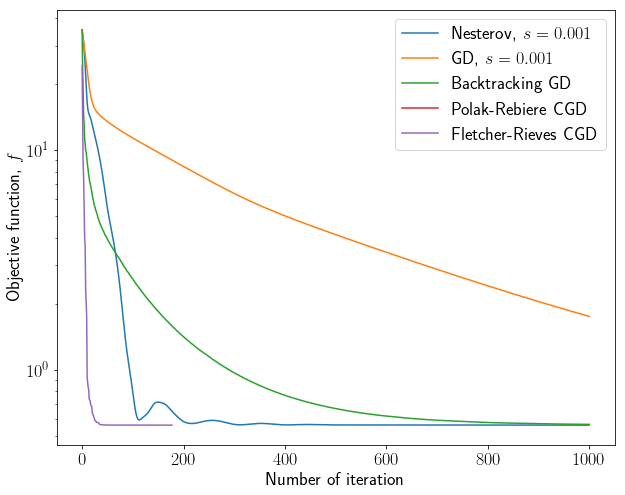

In [16]:
plot_f(logloss, methods)

In [17]:
def plot_grad_norm(grad, methods):
    plt.figure(figsize=(10, 8))
    for m in methods:
        plt.semilogy([np.linalg.norm(grad(x)) for x in m["hist"]], label=m["label"])
    plt.legend(fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.grid("on")
    plt.xlabel("Number of iteration", fontsize=18)
    plt.ylabel("Gradient norm, $\|f'(x)\|_2$", fontsize=18)

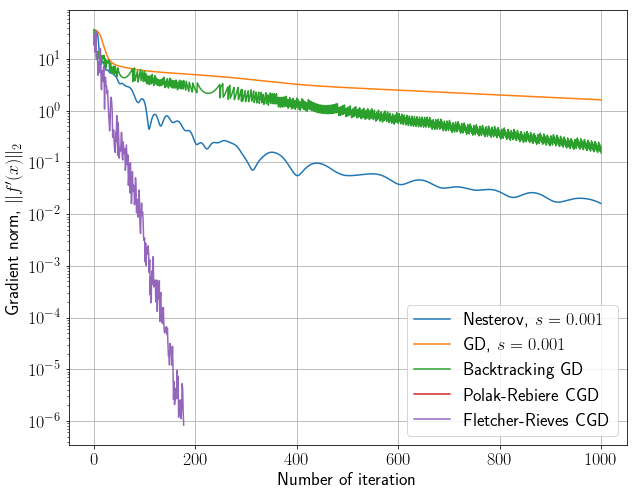

In [18]:
plot_grad_norm(logloss_grad, methods)

## Худший случай

In [19]:
import scipy.sparse as scsp
import scipy.sparse.linalg as scsplin

In [20]:
beta = 1e6

def hard_f(x, beta=beta):
    n = x.shape[0]
    b = np.zeros(n)
    b[0] = 2
    maindiag =2 * np.ones(n)
    subdiag = -1 * np.ones(n)
    A = scsp.spdiags([subdiag, maindiag, subdiag], [-1, 0, 1], n, n)
    return 0.5 * beta * (x.dot(A.dot(x)) - b.dot(x) + 1) + 0.5 * x.dot(x)

def hard_f_grad(x, beta=beta):
    n = x.shape[0]
    b = np.zeros(n)
    b[0] = 2
    maindiag =2 * np.ones(n)
    subdiag = -1 * np.ones(n)
    A = scsp.spdiags([subdiag, maindiag, subdiag], [-1, 0, 1], n, n)
    return x + beta * A.dot(x) - 0.5 * beta * b

In [21]:
n = 200
s = 3e-7
x0 = np.random.randn(n)
# x0 = np.zeros(n)
methods = []
x_acc, hist_acc = acc_gd(hard_f_grad, x0.copy(), s)
methods.append({"label": "Nesterov, $s = {}$".format(s), "hist": hist_acc})
x_gd, hist_gd = gd(hard_f, hard_f_grad, x0.copy(), constant_step)
methods.append({"label": "GD, $s = {}$".format(s), "hist": hist_gd})
x_adapt_gd, hist_adapt_gd = gd(hard_f, hard_f_grad, x0.copy(), backtracking)
methods.append({"label": "Backtracking GD", "hist": hist_adapt_gd})
hist_cg_pl = []
res_cg_pl = scopt.minimize(hard_f, x0.copy(), method="CG", jac=hard_f_grad, 
                           tol=1e-6, options={"maxiter": 1000}, callback=lambda x: hist_cg_pl.append(x))
print(res_cg_pl.message)
methods.append({"label": "Polak-Rebiere CGD", "hist": hist_cg_pl})
hist_cg_fr = []
x_cg_fr = ConjugateGradientFR(hard_f, hard_f_grad, x0.copy(), callback=lambda x: hist_cg_fr.append(x))
methods.append({"label": "Fletcher-Rieves CGD", "hist": hist_cg_fr})
print("Nesterov (s = {}): f* = {}".format(s, hard_f(x_acc)))
print("GD (s = {}): f* = {}".format(s, hard_f(x_gd)))
print("Adaptive GD: f* = {}".format(hard_f(x_adapt_gd)))
print("Polak-Rebiere CGD: f* = {}".format(hard_f(res_cg_pl.x)))
print("Fletcher-Rieves CGD: f* = {}".format(hard_f(x_cg_fr)))

Maxiter exceeds!
Maxiter exceeds!
Maxiter exceeds!
Maximum number of iterations has been exceeded.
Nesterov (s = 3e-07): f* = 2544.98199418
GD (s = 3e-07): f* = 13217.7875699
Adaptive GD: f* = 10093.158262
Polak-Rebiere CGD: f* = 2520.74763542
Fletcher-Rieves CGD: f* = 2520.74698114


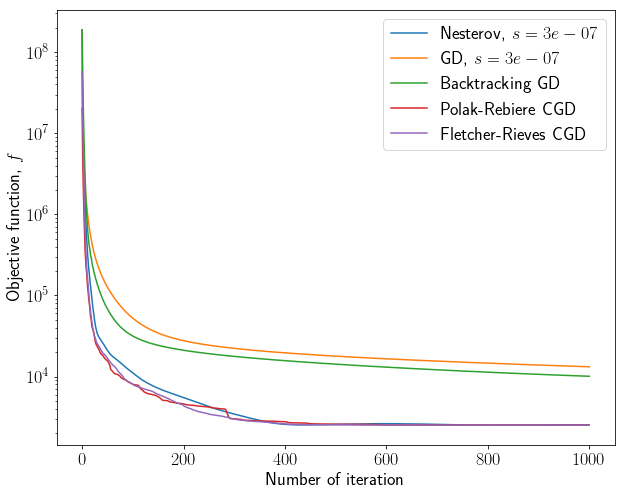

In [22]:
plot_f(hard_f, methods)

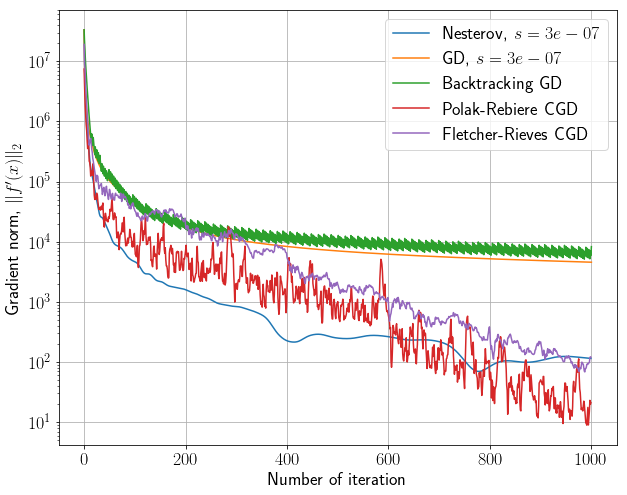

In [23]:
plot_grad_norm(hard_f_grad, methods)

In [24]:
b = np.zeros(n)
b[0] = 2
maindiag =2 * np.ones(n)
subdiag = -1 * np.ones(n)
A = scsp.spdiags([subdiag, maindiag, subdiag], [-1, 0, 1], n, n)
x_true = scsplin.spsolve(scsp.eye(n) + beta * A, 0.5 * beta * b)

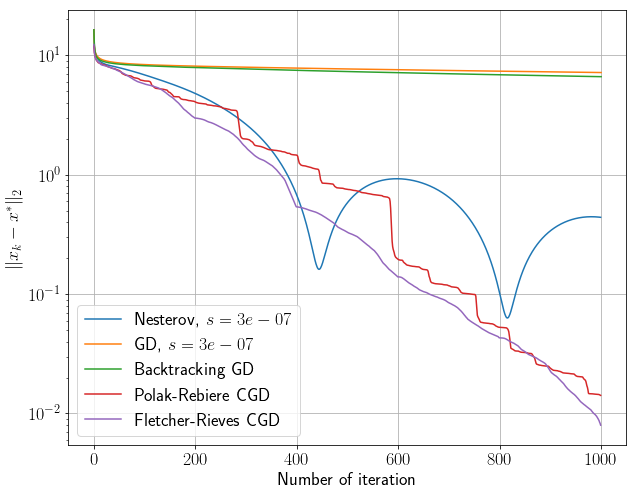

In [25]:
plt.figure(figsize=(10, 8))
for m in methods:
    plt.semilogy([np.linalg.norm(x - x_true) for x in m["hist"]], label=m["label"])
plt.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid("on")
plt.xlabel("Number of iteration", fontsize=18)
plt.ylabel("$\|x_k - x^*\|_2$", fontsize=18)

## Адаптивный выбор шага в методе Нестерова

## Заключение

- Методы первого порядка имеют интерпретацию на языке дифференциальных уравнений
- Шаг в итерационном методе моет быть выбран по критерию устойчивости соответствующей разностной схемы
- На практике теоретически лучшие методы могут проиграть методам, теоретические оценки которых ещё не доказаны